<a href="https://colab.research.google.com/github/AliHina804/Machine-Learning/blob/main/Ass_Property.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# from google.colab import files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
data_frame = pd.read_csv('/content/drive/My Drive/zameen.csv')


In [ ]:
null_count = data_frame.isnull().sum()
print(null_count)

property_id          0
location_id          0
page_url             0
property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
area                 0
purpose              0
bedrooms             0
date_added           0
agency           44071
agent            44072
dtype: int64


In [ ]:
 data_frame.dropna(inplace=True, axis=1)

In [ ]:
data_frame.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019


In [ ]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    168446 non-null  int64  
 1   location_id    168446 non-null  int64  
 2   page_url       168446 non-null  object 
 3   property_type  168446 non-null  object 
 4   price          168446 non-null  int64  
 5   location       168446 non-null  object 
 6   city           168446 non-null  object 
 7   province_name  168446 non-null  object 
 8   latitude       168446 non-null  float64
 9   longitude      168446 non-null  float64
 10  baths          168446 non-null  int64  
 11  area           168446 non-null  object 
 12  purpose        168446 non-null  object 
 13  bedrooms       168446 non-null  int64  
 14  date_added     168446 non-null  object 
dtypes: float64(2), int64(5), object(8)
memory usage: 19.3+ MB


In [ ]:
data_frame.describe()

,property_id,location_id,price,latitude,longitude,baths,bedrooms
count,1.684460e+05,168446.000000,1.684460e+05,168446.000000,168446.000000,168446.000000,168446.000000
mean,1.559626e+07,4375.936395,1.776576e+07,29.859519,71.239804,2.874227,3.179422
std,2.251207e+06,3776.561581,3.531003e+07,3.807870,3.133042,2.463400,1.971401
min,8.657500e+04,1.000000,0.000000e+00,11.052446,25.906027,0.000000,0.000000
25%,1.488320e+07,1058.000000,1.750000e+05,24.948536,67.130363,0.000000,2.000000
50%,1.665851e+07,3286.000000,8.500000e+06,31.459784,73.056182,3.000000,3.000000
75%,1.708662e+07,7220.000000,1.950000e+07,33.560887,73.259870,4.000000,4.000000
max,1.735772e+07,14220.000000,2.000000e+09,73.184088,80.161430,403.000000,68.000000


In [ ]:
data_frame.shape

(168446, 15)

In [ ]:
data_frame.columns

Index(['property_id', 'location_id', 'page_url', 'property_type', 'price',
       'location', 'city', 'province_name', 'latitude', 'longitude', 'baths',
       'area', 'purpose', 'bedrooms', 'date_added'],
      dtype='object')

In [ ]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    168446 non-null  int64  
 1   location_id    168446 non-null  int64  
 2   page_url       168446 non-null  object 
 3   property_type  168446 non-null  object 
 4   price          168446 non-null  int64  
 5   location       168446 non-null  object 
 6   city           168446 non-null  object 
 7   province_name  168446 non-null  object 
 8   latitude       168446 non-null  float64
 9   longitude      168446 non-null  float64
 10  baths          168446 non-null  int64  
 11  area           168446 non-null  object 
 12  purpose        168446 non-null  object 
 13  bedrooms       168446 non-null  int64  
 14  date_added     168446 non-null  object 
dtypes: float64(2), int64(5), object(8)
memory usage: 19.3+ MB


In [ ]:
# data_frame['area'] = pd.to_numeric(data_frame['area'], errors='ignore')
# data_frame['location'] = pd.to_numeric(data_frame['location'], errors='ignore')
# data_frame['city'] = pd.to_numeric(data_frame['city'], errors='ignore')
# data_frame['province_name'] = pd.to_numeric(data_frame['province_name'], errors='ignore')
# data_frame['property_type'] = pd.to_numeric(data_frame['property_type'], errors='ignore')


# NOT WORKING

In [ ]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_type  168446 non-null  object 
 1   price          168446 non-null  int64  
 2   location       168446 non-null  object 
 3   city           168446 non-null  object 
 4   province_name  168446 non-null  object 
 5   latitude       168446 non-null  float64
 6   longitude      168446 non-null  float64
 7   baths          168446 non-null  int64  
 8   area           168446 non-null  object 
 9   bedrooms       168446 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 12.9+ MB


In [ ]:
def convert_area(area):
    if isinstance(area, (int, float)):
      return area

    number = float(area.split()[0].replace(',', ''))
    unit = area.split()[1]

    if unit.lower() == 'marla':
        return number * 272.25
    elif unit.lower() == 'kanal':
        return number * 5445
    else:
        return number

data_frame['area'] = data_frame['area'].apply(convert_area)

# print(data_frame[['area', 'area_numeric']])

In [ ]:
data_frame.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,1089.0,For Sale,2,02-04-2019
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,1524.6,For Sale,3,05-04-2019
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,2178.0,For Sale,5,07-17-2019
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,10890.0,For Sale,4,04-05-2019
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,2178.0,For Sale,3,07-10-2019


In [ ]:
province_mapping = {
    'Islamabad Capital': 5,
    'Punjab': 4,
    'Sindh': 3,
    'Balochistan': 2,
    'Khyber Pakhtunkhwa': 1
}

data_frame['province_name'] = data_frame['province_name'].replace(province_mapping)
data_frame['province_name'].dtype

dtype('int64')

In [ ]:
unique_cities = data_frame['city'].unique()
print("Unique cities:", unique_cities)

Unique cities: ['Islamabad' 'Lahore' 'Faisalabad' 'Rawalpindi' 'Karachi']


In [ ]:
num_unique_cities = data_frame['city'].nunique()
num_unique_cities

5

In [ ]:
city_mapping = {
    'Islamabad': 5,
    'Karachi': 4,
    'Lahore': 3,
    'Faisalabad': 2,
    'Rawalpindi': 1
}

data_frame['city'] = data_frame['city'].replace(city_mapping)
data_frame['city'].dtype

dtype('int64')

In [ ]:
unique_p = data_frame['property_type'].unique()
print(unique_p)
num_unique_p = data_frame['property_type'].nunique()
num_unique_p

['Flat' 'House' 'Penthouse' 'Farm House' 'Lower Portion' 'Upper Portion'
 'Room']


7

In [ ]:
property_mapping = {
    'Flat': 7,
    'House': 6,
    'Penthouse': 5,
    'Farm House': 4,
    'Lower Portion': 3,
    'Upper Portion': 2,
    'Room': 1
}

data_frame['property_type'] = data_frame['property_type'].replace(property_mapping)
data_frame['property_type'].dtype

dtype('int64')

In [ ]:
unique_p = data_frame['location'].unique()
print(unique_p)
num_unique_p = data_frame['location'].nunique()
num_unique_p

['G-10' 'E-11' 'G-15' ... 'Samanzar Colony' 'Shahra-e-Liaquat' 'Sundar']


1509

In [ ]:
unique_locations = data_frame['location'].unique()

location_mapping = {}
i = 0

for location in unique_locations:
    location_mapping[location] = i
    i += 1

data_frame['location'] = data_frame['location'].map(location_mapping)


In [ ]:
# data_frame.drop('location_mapped', axis=1, inplace=True)
data_frame.drop('location_numeric', axis=1, inplace=True)

data_frame.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,7,10000000,0,5,5,33.679890,73.012640,2,1089.0,For Sale,2,02-04-2019
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,7,6900000,1,5,5,33.700993,72.971492,3,1524.6,For Sale,3,05-04-2019
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,6,16500000,2,5,5,33.631486,72.926559,6,2178.0,For Sale,5,07-17-2019
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,6,43500000,3,5,5,33.707573,73.151199,4,10890.0,For Sale,4,04-05-2019
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,6,7000000,4,5,5,33.492591,73.301339,3,2178.0,For Sale,3,07-10-2019


In [ ]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    168446 non-null  int64  
 1   location_id    168446 non-null  int64  
 2   page_url       168446 non-null  object 
 3   property_type  168446 non-null  int64  
 4   price          168446 non-null  int64  
 5   location       168446 non-null  int64  
 6   city           168446 non-null  int64  
 7   province_name  168446 non-null  int64  
 8   latitude       168446 non-null  float64
 9   longitude      168446 non-null  float64
 10  baths          168446 non-null  int64  
 11  area           168446 non-null  float64
 12  purpose        168446 non-null  object 
 13  bedrooms       168446 non-null  int64  
 14  date_added     168446 non-null  object 
dtypes: float64(3), int64(9), object(3)
memory usage: 19.3+ MB


In [ ]:
scaler = StandardScaler()

data_frame['price'] = scaler.fit_transform(data_frame[['price']])
data_frame['property_type'] = scaler.fit_transform(data_frame[['property_type']])
data_frame['latitude'] = scaler.fit_transform(data_frame[['latitude']])
data_frame['longitude'] = scaler.fit_transform(data_frame[['longitude']])
data_frame['baths'] = scaler.fit_transform(data_frame[['baths']])
data_frame['area'] = scaler.fit_transform(data_frame[['area']])
data_frame['bedrooms'] = scaler.fit_transform(data_frame[['bedrooms']])

data_frame.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,0.901983,-0.219931,0,5,5,1.003286,0.565853,-0.354887,-0.022339,For Sale,-0.598268,02-04-2019
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,0.901983,-0.307725,1,5,5,1.008828,0.552720,0.051057,-0.018920,For Sale,-0.091013,05-04-2019
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,0.205431,-0.035847,2,5,5,0.990574,0.538378,1.268890,-0.013791,For Sale,0.923497,07-17-2019
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,0.205431,0.728810,3,5,5,1.010556,0.610079,0.457001,0.054595,For Sale,0.416242,04-05-2019
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,0.205431,-0.304893,4,5,5,0.954099,0.658000,0.051057,-0.013791,For Sale,-0.091013,07-10-2019


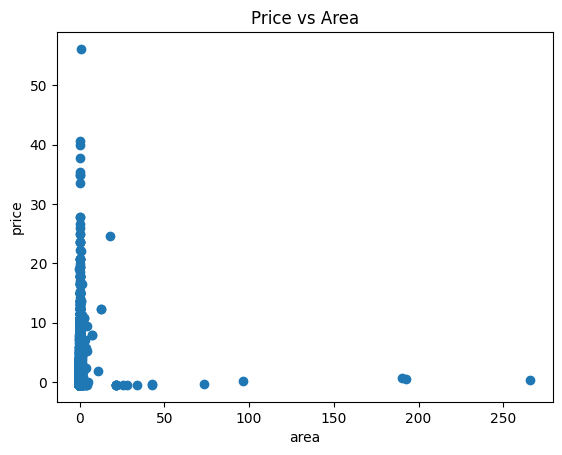

In [ ]:
plt.scatter(data_frame['area'], data_frame['price'])
plt.xlabel('area')
plt.ylabel('price')
plt.title('Price vs Area')
plt.show()

In [ ]:
price = data_frame['price']
price

,price
0,-0.219931
1,-0.307725
2,-0.035847
3,0.728810
4,-0.304893
...,...
168441,0.247359
168442,-0.149130
168443,0.261520
168444,-0.191611


In [ ]:
df_dropped = data_frame.drop('price', axis=1, inplace=True)
# if 'price' in df_dropped.columns:
#     print("The 'price' column is still present in the DataFrame.")
# else:
#     print("The 'price' column has been removed successfully.")
# print("\nDataFrame after removing 'price':")
print(df_dropped)

None


In [ ]:
data_frame.head()

,property_id,location_id,page_url,property_type,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,0.901983,0,5,5,1.003286,0.565853,-0.354887,-0.022339,For Sale,-0.598268,02-04-2019
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,0.901983,1,5,5,1.008828,0.552720,0.051057,-0.018920,For Sale,-0.091013,05-04-2019
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,0.205431,2,5,5,0.990574,0.538378,1.268890,-0.013791,For Sale,0.923497,07-17-2019
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,0.205431,3,5,5,1.010556,0.610079,0.457001,0.054595,For Sale,0.416242,04-05-2019
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,0.205431,4,5,5,0.954099,0.658000,0.051057,-0.013791,For Sale,-0.091013,07-10-2019


In [ ]:
data_frame.shape

(168446, 14)

In [ ]:
df_dropped = data_frame.drop('property_id', axis=1, inplace=True)

In [ ]:
df_dropped = data_frame.drop(  'location_id', axis=1, inplace=True)

In [ ]:
df_dropped = data_frame.drop(  'page_url', axis=1, inplace=True)

In [ ]:
df_dropped = data_frame.drop('purpose', axis=1, inplace=True)

In [ ]:
 df_dropped = data_frame.drop( 'date_added', axis=1, inplace=True)
# df_dropped = data_frame.drop( 'agency', axis=1, inplace=True)


In [ ]:
data_frame.head()

,property_type,location,city,province_name,latitude,longitude,baths,area,bedrooms
0,0.901983,0,5,5,1.003286,0.565853,-0.354887,-0.022339,-0.598268
1,0.901983,1,5,5,1.008828,0.552720,0.051057,-0.018920,-0.091013
2,0.205431,2,5,5,0.990574,0.538378,1.268890,-0.013791,0.923497
3,0.205431,3,5,5,1.010556,0.610079,0.457001,0.054595,0.416242
4,0.205431,4,5,5,0.954099,0.658000,0.051057,-0.013791,-0.091013


In [ ]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_type  168446 non-null  float64
 1   location       168446 non-null  int64  
 2   city           168446 non-null  int64  
 3   province_name  168446 non-null  int64  
 4   latitude       168446 non-null  float64
 5   longitude      168446 non-null  float64
 6   baths          168446 non-null  float64
 7   area           168446 non-null  float64
 8   bedrooms       168446 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 11.6 MB


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ValueError: could not convert string to float: 'House'

In [ ]:
y = data_frame['price']
data_frame.drop('price', inplace=True, axis=1)

In [ ]:
data_frame.head()


,property_type,location,city,province_name,latitude,longitude,baths,area,bedrooms
0,0.901983,0,5,5,1.003286,0.565853,-0.354887,-0.022339,-0.598268
1,0.901983,1,5,5,1.008828,0.552720,0.051057,-0.018920,-0.091013
2,0.205431,2,5,5,0.990574,0.538378,1.268890,-0.013791,0.923497
3,0.205431,3,5,5,1.010556,0.610079,0.457001,0.054595,0.416242
4,0.205431,4,5,5,0.954099,0.658000,0.051057,-0.013791,-0.091013


In [ ]:
X = data_frame
y = price
X

,property_type,location,city,province_name,latitude,longitude,baths,area,bedrooms
0,0.901983,0,5,5,1.003286,0.565853,-0.354887,-0.022339,-0.598268
1,0.901983,1,5,5,1.008828,0.552720,0.051057,-0.018920,-0.091013
2,0.205431,2,5,5,0.990574,0.538378,1.268890,-0.013791,0.923497
3,0.205431,3,5,5,1.010556,0.610079,0.457001,0.054595,0.416242
4,0.205431,4,5,5,0.954099,0.658000,0.051057,-0.013791,-0.091013
...,...,...,...,...,...,...,...,...,...
168441,0.205431,73,4,3,-1.268327,-1.309470,-1.166776,-0.010372,1.430752
168442,0.205431,73,4,3,-1.271467,-1.309725,-1.166776,-0.013791,-0.091013
168443,0.205431,73,4,3,-1.272142,-1.316129,-1.166776,-0.010372,1.430752
168444,0.205431,73,4,3,-1.272698,-1.314696,-1.166776,-0.014218,-0.091013


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
X_train.shape

(126334, 9)

In [ ]:
X_test.shape

(42112, 9)

In [ ]:
y_test.shape

(42112,)

In [ ]:
y_train.shape

(126334,)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([ 1.97491881, -0.50158018,  0.11425229, ..., -0.50223156,
       -0.23409167, -0.33321393])

In [ ]:
msc = mean_squared_error(y_test, y_pred)
print(msc)

0.8275560218376844


In [ ]:
r2 = r2_score(y_test, y_pred)
print(r2)

0.12469533626631568


In [ ]:
data_frame.head()

,property_type,location,city,province_name,latitude,longitude,baths,area,bedrooms
0,0.901983,0,5,5,1.003286,0.565853,-0.354887,-0.022339,-0.598268
1,0.901983,1,5,5,1.008828,0.552720,0.051057,-0.018920,-0.091013
2,0.205431,2,5,5,0.990574,0.538378,1.268890,-0.013791,0.923497
3,0.205431,3,5,5,1.010556,0.610079,0.457001,0.054595,0.416242
4,0.205431,4,5,5,0.954099,0.658000,0.051057,-0.013791,-0.091013


In [ ]:
john_data = np.array([[0.901983, 0, 5, 5, 1.003286, 0.565853, -0.354887, -0.022339, -0.598268]])


john_prediction = model.predict(john_data)
print(john_prediction)

[-0.20148037]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
